In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv('C:/Users/ADITYA/Downloads/delivery_time.csv')

In [3]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
delivery.shape

In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery.mean()

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

In [9]:
delivery.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [10]:
delivery.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [14]:
data=delivery.rename(columns={'Delivery Time':'DT',
                             'Sorting Time':'ST'})

In [15]:
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


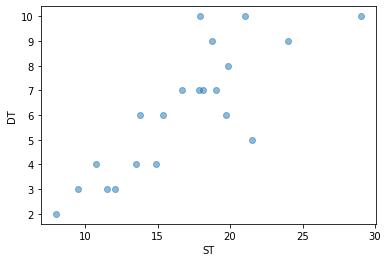

In [16]:
plt.scatter(data['DT'],data['ST'],alpha=0.5)
plt.xlabel('ST')
plt.ylabel('DT')
plt.show()

In [17]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:>

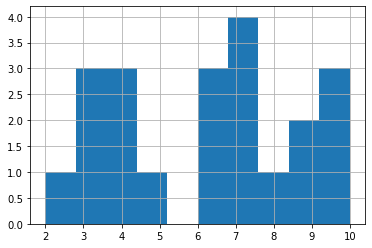

In [18]:
data['ST'].hist()


<AxesSubplot:>

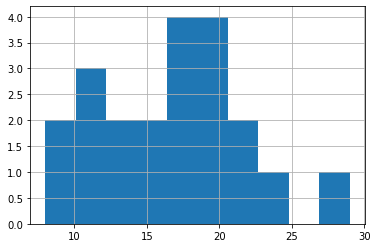

In [19]:
data['DT'].hist()


C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

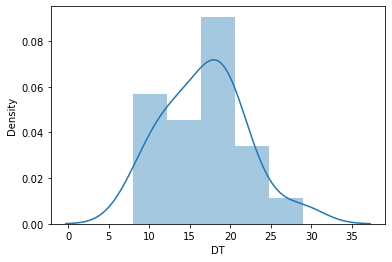

In [20]:
sns.distplot(data['DT'])

C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

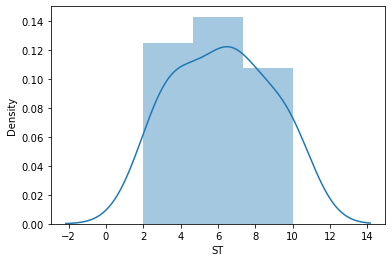

In [21]:
sns.distplot(data['ST'])

<AxesSubplot:>

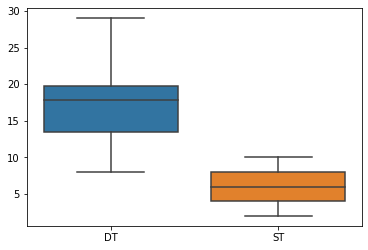

In [22]:
sns.boxplot(data=data)

C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DT'>

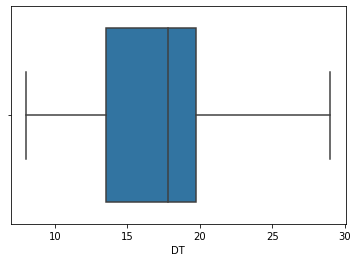

In [23]:
sns.boxplot(data.DT)

C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST'>

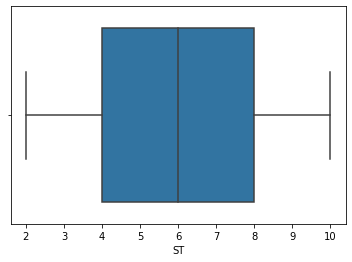

In [24]:
sns.boxplot(data.ST)

<AxesSubplot:xlabel='ST', ylabel='DT'>

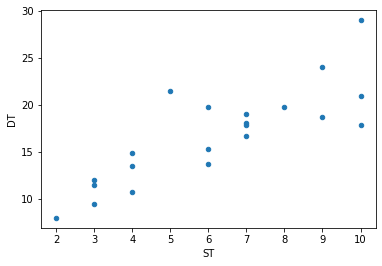

In [25]:
data.plot.scatter(x="ST",y="DT")


<AxesSubplot:xlabel='ST', ylabel='DT'>

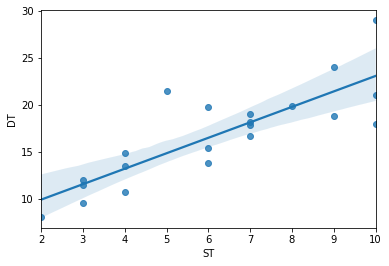

In [27]:
sns.regplot(x="ST",y="DT",data=data)

In [28]:
x=data.ST
y=data.DT

In [29]:
import statsmodels.formula.api as smf
model =smf.ols("data.iloc[:,0]~data.iloc[:, -1]",data=data).fit()


In [30]:
model.params

Intercept           6.582734
data.iloc[:, -1]    1.649020
dtype: float64

In [31]:
print(model.pvalues)

Intercept           0.001147
data.iloc[:, -1]    0.000004
dtype: float64


In [32]:
print(model.tvalues)

Intercept           3.823349
data.iloc[:, -1]    6.387447
dtype: float64


In [33]:
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001DF97512430>>

In [34]:
df=data.iloc[:,1]


In [37]:
ST1=pd.DataFrame(df,columns=['ST'])
ST1

,ST
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [38]:
data_pred=model.predict(ST1)

In [39]:
data_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [40]:
errors = data.ST-data_pred
errors

0    -13.072933
1     -9.178814
2    -10.476853
3    -12.423913
4    -13.072933
5    -10.476853
6    -11.125873
7     -8.529794
8    -13.072933
9    -12.423913
10   -11.774893
11    -9.178814
12   -11.125873
13    -8.529794
14    -8.529794
15    -9.178814
16   -10.476853
17   -11.125873
18    -7.880774
19   -11.125873
20    -9.827833
dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [43]:
mse=mean_squared_error(y,data_pred)
mse

7.793311548584062

In [44]:

rmse =sqrt(mse)
rmse

2.7916503270617654

In [45]:
#Log Transformations
log1=np.log(data['DT'])
log2=np.log(data['ST'])
log3=pd.DataFrame(data=(log1,log2))

In [48]:
log3=log3.transpose()


In [49]:
log3

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<AxesSubplot:xlabel='ST', ylabel='DT'>

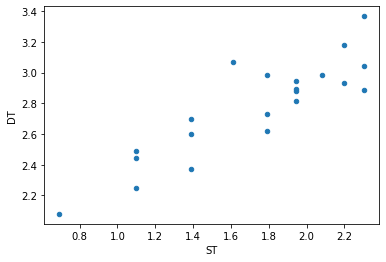

In [50]:
log3.plot.scatter(x="ST",y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

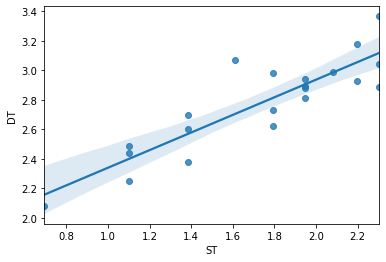

In [51]:
sns.regplot(x='ST',y='DT',data=log3)

In [52]:
sqt1=np.log(data['DT'])
sqt2=np.log(data['ST'])
sqt3=pd.DataFrame(data=(sqt1,sqt2))

In [53]:
sqt3=sqt3.transpose()
sqt3.head(5)

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='DT'>

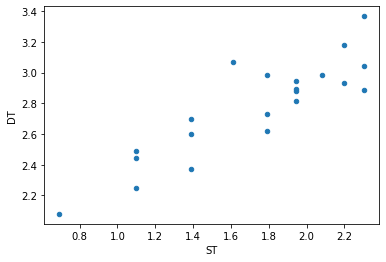

In [54]:
sqt3.plot.scatter(x='ST',y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

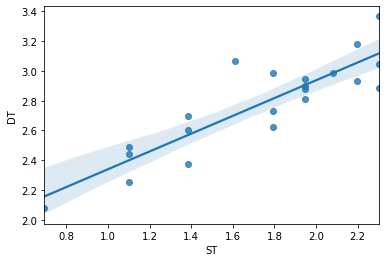

In [55]:
sns.regplot(x='ST',y='DT',data=sqt3)

In [56]:
a1=np.log(data['DT'])
a2=np.log(data['ST'])
a3=pd.DataFrame(data=(a1,a2))

In [57]:
a3=a3.transpose()
a3.head(5)


,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='DT'>

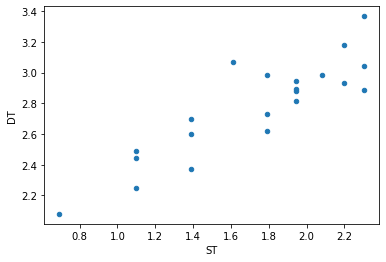

In [58]:
a3.plot.scatter(x="ST",y='DT')

<AxesSubplot:xlabel='ST', ylabel='DT'>

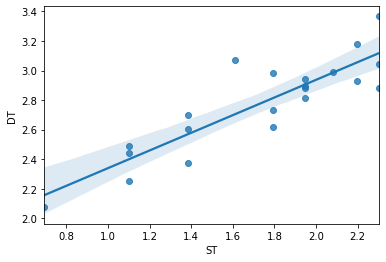

In [59]:
sns.regplot(x='ST',y="DT",data=a3)

In [60]:
b1=1/(data['DT'])
b2=1/(data['ST'])
b3 = pd.DataFrame(data=(b1,b2))
b3=b3.transpose()

In [61]:
b3.head()


,DT,ST
0,0.047619,0.100000
1,0.074074,0.250000
2,0.050633,0.166667
3,0.041667,0.111111
4,0.034483,0.100000


<AxesSubplot:xlabel='ST', ylabel='DT'>

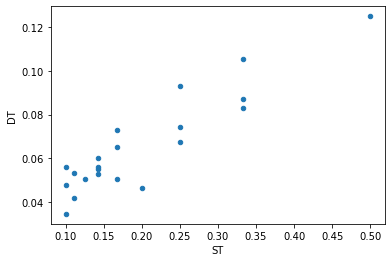

In [62]:
b3.plot.scatter(x='ST',y="DT")

<AxesSubplot:xlabel='ST', ylabel='DT'>

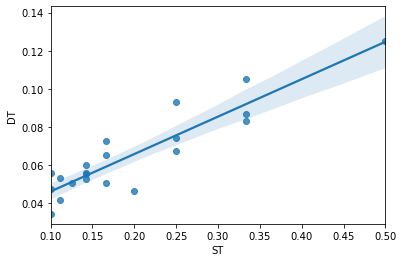

In [63]:
sns.regplot(x='ST',y='DT',data=b3)